# Schelling's Seasonal Sport World

#### Your Name Here: Jonathan Hu

### Intro

In this make believe world there are two distinct groups of people, and they do not get along. These two groups are Winter sports fans and Summer sports fans. Both groups think that their seasonal sports are the best, and they constantly argue with one another. They have collectively decided that the best plan of action is to move around so that everyone has some neighbors that like the same sports as they do. In this assignment you will simulate a torus model that represents the world that was just described.

### Directions

There are three different scenarios that need to be implemented to fully complete this assignment:

Scenario 1: Every home has to have at least 4 or more neighbors that are the same as them.

Scenario 2: Every home has to have between 1 and 4 (inclusive) neigbors that are the same as them.

Scenario 3: The third scenario adds a third neighbor that likes BOTH winter and summer sports. These neighbors are sufficent for both summer sport neighbors and winter sport neihbors. In this scenario we still make sure every home has at least 4 like minded neighbors.

### Grading Scale

#### 100 Points Total

Make sure that you start with a normal array and then randomize it. You cannot hardcode a matrix that already meets the requirements. It HAS to be simulated by moving homes that do not meet the specified requirement to a vacant home.


### Packages

Import the necessary packages. You should be able to complete the assignment by only using these. But, feel free to import other packages if you'd like.

In [1]:
import numpy as np
from numpy.random import shuffle
import random as rand
import matplotlib.pyplot as plt
from matplotlib import colors

### Write a function to initialize the starting matrix for each scenario.

The first and second scenario can use the same function because they only use 2 types of neighbors. You should generate an array 100 people, 50 Winter sports fans and 50 Summer sports fans for the first 2 scenarios. The third scenario will have 33 Winter fans, 33 Summer fans, and 34 Summer/Winter fans. After you generate the array, randomly select 12 homes and set them to 0. 0 will represent a vacant home for this assignment. The Winter and Summer sport fans will be represented by a value of 1 and a value of 2. Homes that do not meet the neighbor requirement will be moved to these vacant homes until all of the homes meet the specified condition. After setting some homes to be vacant, we need to reshape our array into a 10x10 matrix instad of a 1x100 array. Once this is done we can begin the simulation.  

I highly recommend looking into the documentation for numpy if you have not used it before. But, np.random.randint() and np.random.shuffle() might be helpful when creating this function.

#### Function to initialize the starting matrix for the 1st and 2nd scenario
#### 10 Points:

In [2]:
def startUp1and2():
    # Generate arrays with 50 winter sports fans and 50 summer sports fans
    winter_fans = np.ones(50, dtype=int)
    summer_fans = np.ones(50, dtype=int) * 2
    
    # Combine winter and summer fans arrays
    initial_array = np.concatenate((winter_fans, summer_fans))
    
    # Randomly select 12 homes and make them vacant (set to 0)
    vacant_indices = np.random.choice(len(initial_array), 12, replace=False)
    initial_array[vacant_indices] = 0
    
    # Shuffle the array to randomize the order of 1 2 and 0
    np.random.shuffle(initial_array)
    
    # Reshape the array into a 10x10 matrix
    world = initial_array.reshape((10, 10))
    
    # Print the initial matrix
    print("Initial Matrix:")
    print(world)
    
    return world


In [3]:
#Sanity Check
test = startUp1and2()

Initial Matrix:
[[2 0 1 2 1 0 0 1 2 1]
 [0 2 1 1 1 1 1 1 2 2]
 [0 1 2 2 2 0 2 1 2 2]
 [1 1 2 2 1 2 2 1 1 2]
 [2 1 1 2 1 2 2 1 1 2]
 [2 1 2 0 0 2 2 1 2 1]
 [2 2 2 1 2 1 2 1 1 1]
 [0 1 1 2 2 1 2 2 1 0]
 [1 2 2 1 2 1 2 1 2 2]
 [1 1 1 1 2 2 0 0 1 1]]


#### Function to initialize the starting matrix for the 3rd scenario
#### 10 Points:

In [4]:
#Scenario 3 Start-Up

def startUp3():
    # Generate arrays with 33 Winter sports fans, 33 Summer sports fans, and 34 Winter/Summer sports fans
    winter_fans = np.ones(33, dtype=int)
    summer_fans = np.ones(33, dtype=int) * 2
    winter_summer_fans = np.ones(34, dtype=int) * 3
    
    # Combine all three types of fans arrays
    initial_array = np.concatenate((winter_fans, summer_fans, winter_summer_fans))
    
    # Randomly select 12 homes and make them vacant (set to 0)
    vacant_indices = np.random.choice(len(initial_array), 12, replace=False)
    initial_array[vacant_indices] = 0
    
    # Shuffle the array to randomize the order of 1s, 2s, 3s, and 0s
    np.random.shuffle(initial_array)
    
    # Reshape the array into a 10x10 matrix
    world = initial_array.reshape((10, 10))
    
    # Print the initial matrix
    print("Initial Matrix:")
    print(world)
    
    return world

In [5]:
#Sanity Check
test2 = startUp3()

Initial Matrix:
[[2 0 1 2 3 0 3 2 2 0]
 [3 3 0 2 1 1 2 3 1 3]
 [2 2 2 1 1 3 3 1 3 2]
 [3 1 3 3 2 1 1 0 1 3]
 [2 3 2 2 1 3 3 2 1 1]
 [0 3 1 1 2 2 1 2 0 3]
 [0 2 2 3 0 2 2 3 0 0]
 [1 1 3 1 3 1 3 1 3 3]
 [3 2 3 2 2 2 1 2 1 1]
 [2 1 3 2 2 0 1 3 3 3]]


### Determine which cells are vacant

Create a function to find the locations of the vacant spaces. There are many ways to do this, one way is to loop through our matrix and append the indices where the given home is vacant.

#### 10 Points:

In [6]:
#determines the locations in the matrix where homes are vacant
#function takes in matrix that contains neighbor info, we return the list of indices where the homes are vacant
def vacancies(world):
    vacant_homes = []
    rows, cols = world.shape

    # Loop through every row in the world matrix
    for row in range(rows):
        # Nested loop through every column in the current row of the world matrix
        for col in range(cols):
            # If the current home is vacant, append the current row/column indices to the vacant_homes list
            if world[row, col] == 0:
                vacant_homes.append((row, col)) 

    return vacant_homes

In [7]:
test = startUp1and2()
print(vacancies(test))

Initial Matrix:
[[1 1 1 2 1 1 2 1 0 0]
 [1 0 1 1 2 2 2 2 2 0]
 [0 0 2 2 2 1 2 2 1 1]
 [1 0 2 2 1 1 2 2 1 1]
 [0 1 1 1 1 2 2 2 1 1]
 [2 2 1 0 2 0 2 2 2 1]
 [1 1 1 1 0 2 1 2 1 2]
 [2 2 2 1 1 2 1 2 2 2]
 [2 2 0 2 1 1 2 1 2 2]
 [1 2 2 1 2 1 1 2 2 2]]
[(0, 8), (0, 9), (1, 1), (1, 9), (2, 0), (2, 1), (3, 1), (4, 0), (5, 3), (5, 5), (6, 4), (8, 2)]


### Move Neighbor

Create a function to move the people in a home that does not meeting the neighbor requirements to a vacant home. You should randomly choose a set of indices that are stored in 'vacant_homes' and perform a swap with current home type and the vacant home type. After the home is swapped return our updated world.

#### 10 Points:

In [8]:
#relocates a family that has insufficient neighbors to a random empty cell
#function takes in a row and column index, a list of indices containing the vacant homes, and a matrix of the world

def move(row, col, vacant_homes, world):
    # Convert vacant_homes list to a 1-dimensional array
    vacant_homes = np.array(vacant_homes)

    # Randomly choose a vacant_home from the list
    vacant_idx = np.random.choice(len(vacant_homes))
    vacant_row, vacant_col = vacant_homes[vacant_idx]

    # Make a temp variable to store the vacant home type
    vacant_home_type = world[vacant_row, vacant_col]

    # Move the new people into the vacant home
    world[vacant_row, vacant_col] = world[row, col]

    # Set the old home that was moved out of to the temp variable that stored the vacant home
    world[row, col] = vacant_home_type

    return world

### Determine Neighbors

Create a function to determine which neighbors are surrounding the current home. Keep in mind that this is a torus model. That means the far left column connects with the far right column, and the top row connects to the bottom row. Think of the model as a sphere or world rather than a grid or world. It might help to draw/print out an example matrix to help visualize what the neighbor would be for edge columns/rows.  **This can easily be solved by brute force (demonstrated below) using if-statements if you understand the layout of the torus matrix** . All cells will have 8 neighbors. Make sure to include all of them in the if-statements. **Any more elegant methods that achieve the required outcomes/output are welcome!**.

#### 10 Points:

In [9]:
#creates a list of neighboring cells that surround a given cell. 
#Left/Right/Top/Bottom columns/rows wrap around so everything is connected
#Brute Force Pseudo-Code Below
def whosAround(row, col, world):
    rows, cols = world.shape
    neighbors = []

    # Check left neighbor
    left = world[row, (col - 1) % cols]
    neighbors.append(left)

    # Check right neighbor
    right = world[row, (col + 1) % cols]
    neighbors.append(right)

    # Check top-left neighbor
    top_left = world[(row - 1) % rows, (col - 1) % cols]
    neighbors.append(top_left)

    # Check top-middle neighbor
    top_middle = world[(row - 1) % rows, col]
    neighbors.append(top_middle)

    # Check top-right neighbor
    top_right = world[(row - 1) % rows, (col + 1) % cols]
    neighbors.append(top_right)

    # Check bottom-left neighbor
    bottom_left = world[(row + 1) % rows, (col - 1) % cols]
    neighbors.append(bottom_left)

    # Check bottom-middle neighbor
    bottom_middle = world[(row + 1) % rows, col]
    neighbors.append(bottom_middle)

    # Check bottom-right neighbor
    bottom_right = world[(row + 1) % rows, (col + 1) % cols]
    neighbors.append(bottom_right)

    return neighbors

### Create a Schelling Model that implements the rules describes in Scenario 1: 

This means that a Winter sports fan must have at least 4 neighbors that are also Winter sports fans. If they do not have at least 4 neighbors we have to move them.

Use the helper functions you previously made to create this. i.e. vacancies(), whosAround(), and move() will all be necessary to complete this function.

#### 10 Points:

In [10]:
def SchellingModel1(world):
    diff_check = 0
    rows, cols = world.shape

    # Create a copy of the world matrix to avoid modifying the original matrix
    updated_world = np.copy(world)

    # Loop through every row in the world matrix
    for row in range(rows):
        for col in range(cols):
            vacant_homes = vacancies(world)
            neighbors = whosAround(row, col, world)
            current_home = world[row, col]
            same_neighbor_count = 0

            # Loop through neighbors to count how many are the same as the current location
            for neighbor in neighbors:
                if neighbor == current_home:
                    same_neighbor_count += 1

            # After looping through neighbors, check count of same neighbors
            if current_home != 0 and same_neighbor_count < 4:
                # Increase the diff_check if neighbor requirement is not met
                diff_check += 1

                # Call move() with updated world because neighbor requirement is not met
                updated_world = move(row, col, vacant_homes, updated_world)

    return updated_world, diff_check

### Create a Schelling model that implements the rules described in scenario 2:

This means that a Winter/Summer sports fan must have between 1 and 4 neighbors to be considered sufficient.

Once again, use the helper functions that you created earlier to solve this function.

#### 10 Points:

In [11]:
def SchellingModel2(world):
    diff_check = 0
    rows, cols = world.shape

    # Loop through every row in the world matrix
    for row in range(rows):
        for col in range(cols):
            vacant_homes = vacancies(world)

            # Get the neighbors surrounding the current location
            neighbors = whosAround(row, col, world)
            current_home = world[row, col]
            same_neighbor_count = 0

            # Loop through neighbors to count how many are the same as the current location
            for neighbor in neighbors:
                if neighbor == current_home:
                    same_neighbor_count += 1

            # Check if the current home is a Winter Sports Fan (1) or Summer Sports Fan (2)
            if current_home in [1, 2]:
                # Calculate the count of neighbors with the same season preference
                same_season_neighbors = sum(1 for neighbor in neighbors if neighbor == current_home)

                # 1 <= same_season_neighbors <= 4
                if same_season_neighbors < 1 or same_season_neighbors > 4:
                    # Increase the diff_check because neighbor requirement is not met
                    diff_check += 1

                    # Call move() with updated world because neighbor requirement is not met
                    world = move(row, col, vacant_homes, world)

    return world, diff_check

### Create a Schelling Model that implements the rules described in scenario 3:

This means that Winter and Summer sports fans must have at least 4 neighbors that like the same season for sports as them or both seasons of sports.

#### 10 Points:

In [12]:
def SchellingModel3(world):
    diff_check = 0
    rows, cols = world.shape

    # Create a copy of the world matrix
    updated_world = np.copy(world)

    # Loop through every row in the world matrix
    for row in range(rows):
        for col in range(cols):
            vacant_homes = vacancies(world)
            neighbors = whosAround(row, col, world)
            current_home = world[row, col]
            same_neighbor_count = 0

            # Loop through neighbors to count how many are the same as the current location
            for neighbor in neighbors:
                if current_home == 1:  # Current home likes Winter sports
                    if neighbor == 1 or neighbor == 2 or neighbor == 3:
                        same_neighbor_count += 1
                elif current_home == 2:  # Current home likes Summer sports
                    if neighbor == 1 or neighbor == 2 or neighbor == 3:
                        same_neighbor_count += 1
                else:  # Current home likes both Winter and Summer sports
                    if neighbor == 1 or neighbor == 2 or neighbor == 3:
                        same_neighbor_count += 1

            # Same_neighbor_count >= 4
            if (current_home == 1 or current_home == 2) and same_neighbor_count < 4:
                # Increase the diff_check because neighbor requirement is not met
                diff_check += 1

                # Call move with updated world because neighbor requirement is not met
                updated_world = move(row, col, vacant_homes, updated_world)

    return updated_world, diff_check

### Create a Main Function For Scenario 1, 2 and 3:

You should run the Schelling Model function until there are only 12 neighbors who do not meet the requirements. These 12 neighbors represent the 12 vacant homes. I recommend using a while loop that calls the Schelling Model function until the number of neighbors not meeting requirements is 12. 

Use plt.imshow() to create a graphic visualization of your matrix. You should be able to produce a graph that represents the new sorted world for each condition.

You should print out the current amount of homes that have too many neighbors that prefer a different season of sports as they do. Once this value hits 0 you know that your graph is sorted. You should also do a visual check as well to make sure that the value being printed is true.

#### 10 Points:

In [13]:
def check1(world):
    while True:
        world, diff_check = SchellingModel1(world)
        if diff_check > 12:
            # Print out the world and continue the while loop
            print("Generating World:")
            print(world)
        else:
            # Print out the world, show the image, and return
            print("Final World:")
            print(world)
            plt.imshow(world)
            plt.show()
            return

Initial Matrix:
[[0 2 2 1 1 2 1 1 2 1]
 [2 1 2 1 1 2 1 2 2 2]
 [2 2 0 2 2 1 2 2 0 2]
 [2 2 2 0 1 1 2 2 2 2]
 [0 1 1 1 0 0 0 2 1 1]
 [1 2 2 1 1 1 2 1 2 1]
 [0 0 2 1 1 2 1 2 1 1]
 [1 1 2 1 1 1 2 2 2 1]
 [1 1 1 2 2 1 2 1 1 0]
 [1 2 0 2 2 2 2 1 2 2]]
Generating World:
[[2 2 2 0 1 2 0 0 2 1]
 [2 0 2 1 1 0 0 2 2 2]
 [2 2 1 0 0 1 2 2 2 2]
 [2 2 0 2 2 1 2 2 2 2]
 [2 0 1 1 2 2 0 2 2 1]
 [1 2 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 2 2 2 1 1]
 [1 1 1 1 1 1 2 2 1 1]
 [1 1 2 2 2 1 2 1 2 1]
 [2 1 2 2 2 2 0 1 2 1]]
Generating World:
[[2 2 2 2 0 0 2 1 2 0]
 [2 1 0 0 0 1 2 2 2 2]
 [2 2 0 1 1 0 2 2 2 2]
 [2 2 2 0 1 1 2 2 2 2]
 [2 0 2 1 0 2 1 2 2 0]
 [1 1 1 1 1 2 2 1 1 1]
 [1 1 1 1 1 1 2 1 1 1]
 [1 1 1 1 1 1 2 2 1 1]
 [1 1 2 2 2 1 1 2 2 1]
 [1 1 2 2 2 2 2 2 1 2]]
Generating World:
[[2 2 2 2 0 1 2 0 2 2]
 [2 1 0 1 2 0 2 2 2 2]
 [2 2 0 0 1 2 2 2 2 2]
 [2 2 0 1 1 2 2 2 2 2]
 [0 2 1 1 1 2 0 2 2 1]
 [1 1 1 1 1 1 2 1 1 1]
 [1 1 1 1 1 1 2 1 1 1]
 [1 1 1 1 1 1 2 2 1 1]
 [1 1 0 2 2 0 0 2 2 1]
 [1 2 2 2 2 2 2 2 1 1]]
Genera

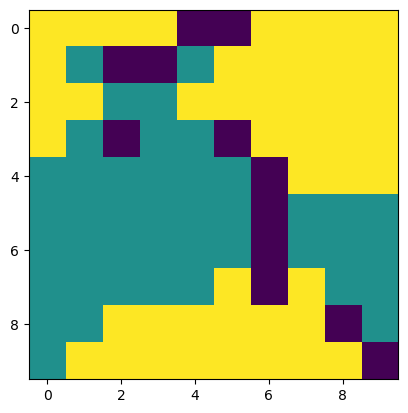

In [14]:
world = startUp1and2()
check1(world)

### Main Function For Scenario 2:

#### 5 Points:

In [15]:
def check2(world):
    while True:
        world, diff_check = SchellingModel2(world)
        #if diff_check is over the thresh-hold:
        if diff_check > 12:
            # Print out the world and continue the while loop
            print("Generating World:")
            print(world)
        #if every home has suffienct neighbors:
        else:
            # Print out the world, show the image, and return
            print("Final World:")
            print(world)
            plt.imshow(world)
            plt.show()
            return

Initial Matrix:
[[1 2 2 1 1 1 1 1 1 1]
 [1 0 2 1 1 2 2 0 0 0]
 [1 2 0 1 1 2 1 2 1 1]
 [2 1 2 1 2 1 1 0 2 2]
 [2 2 2 1 2 0 1 2 1 2]
 [2 1 2 2 1 2 1 1 2 1]
 [2 0 0 0 2 1 1 1 2 1]
 [0 2 2 2 1 2 1 2 1 1]
 [1 1 2 2 1 1 1 2 2 1]
 [1 2 1 2 2 2 2 1 1 0]]
Generating World:
[[1 2 2 1 1 1 1 1 1 0]
 [1 0 2 1 0 2 2 0 2 2]
 [1 2 0 1 1 2 1 2 1 1]
 [2 1 2 1 2 2 1 2 1 2]
 [1 0 2 1 2 1 1 2 1 2]
 [2 1 2 2 1 2 0 1 2 1]
 [2 1 1 1 2 1 1 1 2 1]
 [1 2 2 2 1 2 0 2 1 1]
 [1 1 0 2 1 1 1 2 2 0]
 [1 2 1 2 2 2 2 0 1 0]]
Final World:
[[1 2 2 1 1 1 1 1 1 0]
 [1 1 2 1 0 2 2 0 2 2]
 [1 2 0 1 1 2 1 2 1 1]
 [2 1 2 1 2 2 1 2 1 2]
 [1 0 2 1 2 1 1 2 1 2]
 [2 1 2 2 1 2 0 1 2 1]
 [2 1 1 1 2 1 1 1 2 1]
 [0 2 2 2 1 2 0 2 1 1]
 [1 1 0 2 1 1 1 2 2 0]
 [1 2 1 2 2 2 2 0 1 0]]


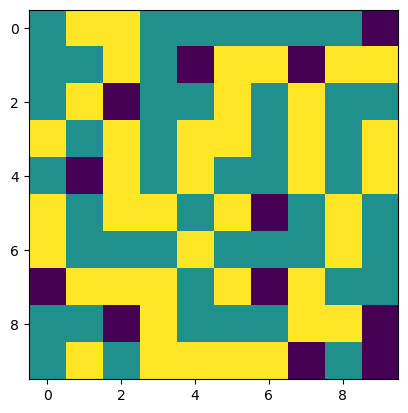

In [16]:
world = startUp1and2()
check2(world)

### Main Function For Scenario 3:

#### 5 Points:

In [17]:
def check3(world):
    while True:
        world, diff_check = SchellingModel2(world)
        if diff_check > 12:
            # Print out the world and continue the while loop
            print("Generating World:")
            print(world)
        else:
            # Print out the world, show the image, and return
            print("Final World:")
            print(world)
            plt.imshow(world)
            plt.show()
            return

Initial Matrix:
[[2 2 3 2 1 1 3 3 1 2]
 [1 2 0 1 1 3 3 1 1 3]
 [1 1 3 2 1 3 0 3 1 3]
 [3 2 3 3 3 2 0 3 1 2]
 [0 1 3 1 3 1 1 0 2 1]
 [3 2 2 2 0 1 2 0 1 1]
 [3 3 3 2 1 3 3 0 2 1]
 [2 2 0 3 3 0 3 2 0 3]
 [1 1 1 2 1 3 3 3 2 2]
 [3 2 3 2 0 1 2 2 1 1]]
Final World:
[[2 2 3 2 1 1 3 3 1 2]
 [1 2 0 1 1 3 3 1 1 3]
 [1 1 3 0 1 3 0 3 1 3]
 [3 2 3 3 3 0 0 3 1 2]
 [0 1 3 0 3 1 1 0 2 1]
 [3 2 2 2 0 1 2 2 1 1]
 [3 3 3 2 1 3 3 0 2 1]
 [2 2 0 3 3 0 3 2 2 3]
 [1 1 1 2 1 3 3 3 2 2]
 [3 2 3 2 1 1 2 2 1 1]]


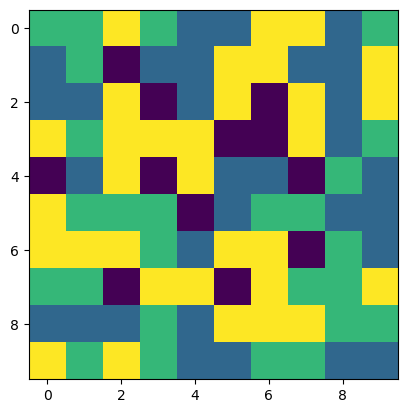

In [18]:
world = startUp3()
check3(world)